# Análisis de los precios de las Viviendas en Colombia (2019-2020)

Base de Datos tomada de: https://www.kaggle.com/julianusugaortiz/colombia-housing-properties-price

## Análisis Exploratorio de Datos

In [ ]:
#!pip install geopandas==0.10.2

In [ ]:
# Importar librerías aquí
import numpy as np 
import pandas as pd 
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [ ]:
# Importar datos aquí
dfOriginal = pd.read_csv('/work/co_properties.csv')
dfOriginal.head(5)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,Z5GURF86+s3KVdbvKdx4dQ==,Propiedad,2020-04-07,2020-05-22,2020-04-07,6.287127,-75.336540,Colombia,Antioquia,NaN,...,NaN,NaN,NaN,9.000000e+07,COP,NaN,Sevende Finca en Chaparrel de San Visent,sevende finca mas 9 lotes en san visente ver...,Otro,Venta
1,EbOqfrqoJKUuVFzkBymDgA==,Propiedad,2020-04-07,2020-05-15,2020-04-07,6.287127,-75.336540,Colombia,Antioquia,NaN,...,NaN,NaN,NaN,4.500000e+08,COP,NaN,Sevende Finca en San Visente An Tioquia 14 et...,sevende finca en san visente aprosimada mente ...,Otro,Venta
2,4et4/CQ6/jiiA31QcGbBSQ==,Propiedad,2020-04-07,2020-05-22,2020-04-07,NaN,NaN,Colombia,Antioquia,NaN,...,NaN,NaN,NaN,2.600000e+09,COP,NaN,Venta de Lote Vereda Puente Pelaez El Retiro _...,"Lote de 145.336 metros, topografia quebrada, c...",Otro,Venta
3,DnzyLOD2CU/exv0dQhVS/A==,Propiedad,2020-04-07,2020-07-02,2020-04-07,6.291447,-75.338812,Colombia,Antioquia,NaN,...,NaN,NaN,NaN,9.500000e+07,COP,NaN,Lote/terreno de 7000 mts2 nacimiento de agua S...,DESCRIPCION\n\nEspectacular oportunidad de neg...,Otro,Venta
4,Pg12IF9sRDSCcWZU6L2yig==,Propiedad,2020-04-07,2020-07-20,2020-04-07,3.457576,-76.558938,Colombia,Valle del Cauca,Cali,...,NaN,NaN,NaN,1.700000e+08,COP,NaN,"322.4 Venta de Lote en Aguacatal, Oeste de Cali",EXCELENTE OPORTUNIDAD PARA INVERSIÓN.\n\nVenta...,Otro,Venta


In [ ]:
dfOriginal.shape

(1000000, 25)

In [ ]:
dfOriginal.columns


Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [ ]:
df = dfOriginal
#I'm only interested in apartments and houses
property_types = (df["property_type"] == "Apartamento") | (df["property_type"] == "Casa")
property_types
df = df[property_types]

#I'm only interested in apartments and houses
operation_type = (df["operation_type"] == "Venta") 
operation_type
df = df[operation_type]

#df.head(5)
dfbackup = df

In [ ]:
columns = df.columns
columns = columns[(columns != "id")&(columns != "start_date")&(columns != "end_date")&(columns != "created_on")&(columns != "l1")&(columns != "l4")&(columns != "l5")&(columns != "l6")&(columns != "l1")&(columns != "title")&(columns != "description")&(columns != "price_period")&(columns != "currency")&(columns != "operation_type")&(columns != "ad_type")&(columns != "rooms")]
df = df[columns]
#df.head(5)

In [ ]:
df.shape


(436179, 10)

In [ ]:
df = df.rename(columns={'l2':'Department','l3':'City'})
df.columns

Index(['lat', 'lon', 'Department', 'City', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'property_type'],
      dtype='object')

In [ ]:
df.isnull().sum()

lat                 70986
lon                 70986
Department              0
City                23041
bedrooms           306281
bathrooms           39898
surface_total      360596
surface_covered    352312
price                1317
property_type           0
dtype: int64

In [ ]:
#remove rows with null value
#df.dropna(subset= ['price','lat','lon','City'],inplace = True)
df.dropna(inplace = True)
df.reset_index(drop=True,inplace=True)

In [ ]:
df.isnull().sum()

lat                0
lon                0
Department         0
City               0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [ ]:
df_filtrado = df
df.shape


(16568, 10)

In [ ]:
df_filtrado = df_filtrado[df_filtrado["price"] > 10000000]

df_filtrado = df_filtrado[df_filtrado["price"] < 1000000001]

df_filtrado = df_filtrado[df_filtrado["surface_total"] < 2000]

df_filtrado = df_filtrado[df_filtrado["surface_covered"] < 1000]



df_filtrado = df_filtrado[df_filtrado["bedrooms"] > -1]

df_filtrado = df_filtrado[df_filtrado["bathrooms"] > -1]

df_filtrado = df_filtrado[df_filtrado["surface_total"] > 0]

df_filtrado = df_filtrado[df_filtrado["surface_covered"] > 0]



In [ ]:
df_filtrado['P/sqmtr'] = df_filtrado['price'] // df_filtrado['surface_total']

In [ ]:
df_filtrado.shape


(13803, 11)

In [ ]:
df_filtrado.head(5)


,lat,lon,Department,City,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,P/sqmtr
0,11.006,-74.808,Atlántico,Barranquilla,2.0,2.0,95.0,95.0,280000000.0,Apartamento,2947368.0
2,4.689,-74.050,Cundinamarca,Bogotá D.C,2.0,3.0,125.0,125.0,810000000.0,Apartamento,6480000.0
3,3.446,-76.551,Valle del Cauca,Cali,3.0,2.0,91.0,91.0,495000000.0,Apartamento,5439560.0
4,3.383,-76.537,Valle del Cauca,Cali,3.0,2.0,100.0,100.0,350000000.0,Apartamento,3500000.0
5,3.437,-76.548,Valle del Cauca,Cali,3.0,3.0,155.0,139.0,630000000.0,Apartamento,4064516.0


In [ ]:
df_filtrado.head(10)

,lat,lon,Department,City,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,P/sqmtr
0,11.006,-74.808,Atlántico,Barranquilla,2.0,2.0,95.0,95.0,280000000.0,Apartamento,2947368.0
2,4.689,-74.050,Cundinamarca,Bogotá D.C,2.0,3.0,125.0,125.0,810000000.0,Apartamento,6480000.0
3,3.446,-76.551,Valle del Cauca,Cali,3.0,2.0,91.0,91.0,495000000.0,Apartamento,5439560.0
4,3.383,-76.537,Valle del Cauca,Cali,3.0,2.0,100.0,100.0,350000000.0,Apartamento,3500000.0
5,3.437,-76.548,Valle del Cauca,Cali,3.0,3.0,155.0,139.0,630000000.0,Apartamento,4064516.0
6,4.723,-74.039,Cundinamarca,Bogotá D.C,3.0,3.0,93.0,93.0,500000000.0,Apartamento,5376344.0
7,4.753,-74.069,Cundinamarca,Bogotá D.C,5.0,4.0,149.0,167.0,850000000.0,Casa,5704697.0
9,3.438,-76.536,Valle del Cauca,Cali,4.0,2.0,300.0,300.0,600000000.0,Casa,2000000.0
10,3.576,-76.489,Valle del Cauca,Yumbo,2.0,2.0,60.0,120.0,170000000.0,Casa,2833333.0
11,3.255,-76.540,Valle del Cauca,Jamundí,3.0,2.0,113.0,98.0,330000000.0,Casa,2920353.0


## Visualización efectiva de Datos

In [ ]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Indicator(mode = "number", value = df_filtrado.shape[0], number={'font':{'color': '#E58F65','size':100}}, title = {"text": "🧾 Rows<br><span style='font-size:0.8em;color:gray'>In the Dataframe</span>"}, domain = {'x': [0, 0.5], 'y': [0.6, 1]}))
fig.add_trace(go.Indicator(mode = "number", value = df_filtrado.shape[1], number={'font':{'color': '#E58F65','size':100}}, title = {"text": "⭕ Columns<br><span style='font-size:0.8em;color:gray'>In the Dataframe</span>"}, domain = {'x': [0.5, 1], 'y': [0, 0.4]}))
fig.show()

### ¿Donde están ubicadas las viviendas?

In [ ]:
m_5 = folium.Map(location=[5.170035, -74.914305], tiles='cartodbpositron', zoom_start=6)

# Add a heatmap to the base map
HeatMap(data=df_filtrado[['lat', 'lon']], radius=10).add_to(m_5)

# Display the map
m_5

In [ ]:
df_filtrado.Department

0                 Atlántico
2              Cundinamarca
3           Valle del Cauca
4           Valle del Cauca
5           Valle del Cauca
                ...        
16558       Valle del Cauca
16562       Valle del Cauca
16563    Norte de Santander
16564       Valle del Cauca
16565          Cundinamarca
Name: Department, Length: 13803, dtype: object

In [ ]:
Departamentos = df_filtrado['Department'].value_counts().reset_index()
Departamentos.columns = ['Department', 'counts']
Departamentos

,Department,counts
0,Cundinamarca,4256
1,Valle del Cauca,3870
2,Antioquia,2495
3,Atlántico,1925
4,Risaralda,385
5,Norte de Santander,221
6,Santander,214
7,Quindío,189
8,Bolívar,59
9,Tolima,53


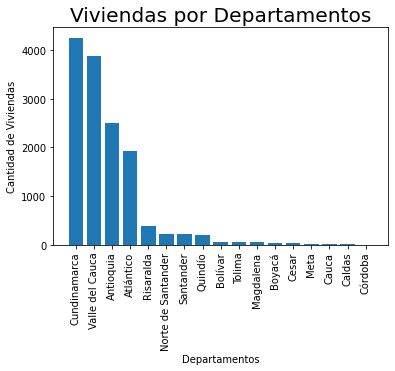

In [ ]:
x = Departamentos['Department']#Aplicamos slicing como en una lista de Python.
y = Departamentos['counts']

plt.bar(x, y)
plt.style.use("fivethirtyeight")

plt.title('Viviendas por Departamentos')
plt.xlabel('Departamentos')
plt.ylabel('Cantidad de Viviendas')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()


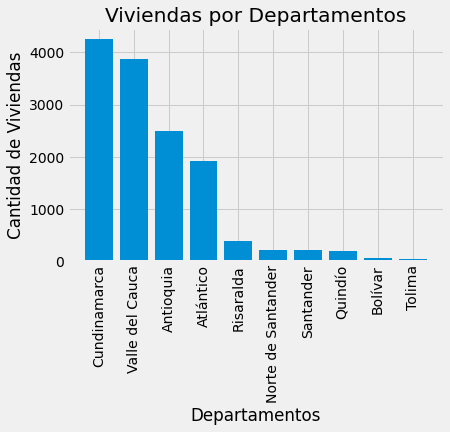

In [ ]:
x = Departamentos['Department'][0:10]#Aplicamos slicing como en una lista de Python.
y = Departamentos['counts'][0:10]

plt.bar(x, y)
plt.title('Viviendas por Departamentos')
plt.xlabel('Departamentos')
plt.ylabel('Cantidad de Viviendas')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()

### ¿Qué tipos de vivienda se ofrecen?

In [ ]:
df_filtrado.property_type

0        Apartamento
2        Apartamento
3        Apartamento
4        Apartamento
5        Apartamento
            ...     
16558           Casa
16562           Casa
16563           Casa
16564           Casa
16565           Casa
Name: property_type, Length: 13803, dtype: object

In [ ]:
TipoVivienda = df_filtrado['property_type'].value_counts().reset_index()
TipoVivienda.columns = ['property_type', 'counts']
TipoVivienda

,property_type,counts
0,Apartamento,9328
1,Casa,4475


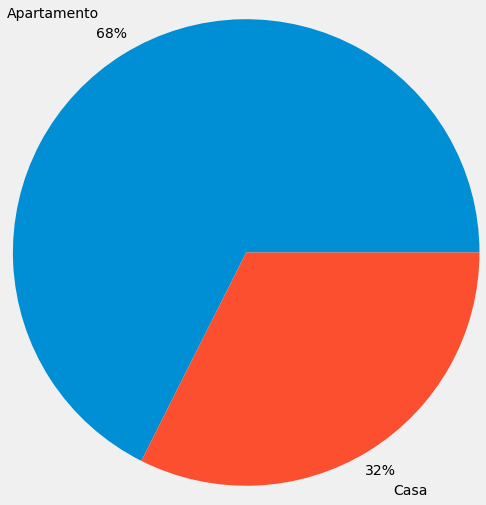

In [ ]:
plt.pie(TipoVivienda['counts'],labels = TipoVivienda['property_type'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,radius=2.5);

### Precios de la vivienda en Colombia

In [ ]:
Precios = df_filtrado['price']
Precios = df_filtrado.sort_values('price', ascending=0)
#Precios.head(100)

In [ ]:
RangoPrecios = max(Precios['price']) - min(Precios['price'])
RangoPrecios

972000000.0

In [ ]:
max(Precios['price'])

1000000000.0

In [ ]:
min(Precios['price'])

28000000.0

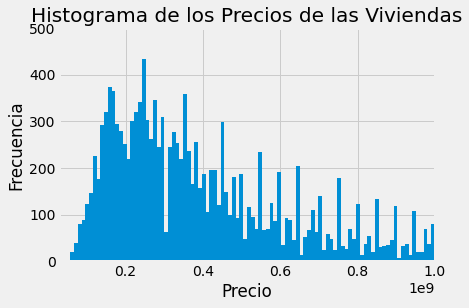

In [ ]:
plt.hist(Precios['price'], bins=100)

plt.grid(True)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Precios de las Viviendas')
plt.xlim(28000000, 1000000000)
plt.ylim(0,500)
plt.show()

In [ ]:
sp = df_filtrado[['Department','P/sqmtr']].groupby(['Department']).agg(['mean'])
sp.columns=['Media del Precio del Metro Cuadrado']

sp = sp.nlargest(30, ['Media del Precio del Metro Cuadrado']) 

sp



,Media del Precio del Metro Cuadrado
Department,
Cundinamarca,4.822493e+06
Bolívar,4.319058e+06
Magdalena,4.131218e+06
Antioquia,3.565034e+06
Boyacá,3.330059e+06
Atlántico,3.037159e+06
Caldas,2.909760e+06
Valle del Cauca,2.810802e+06
Santander,2.719460e+06


<AxesSubplot:xlabel='Department'>

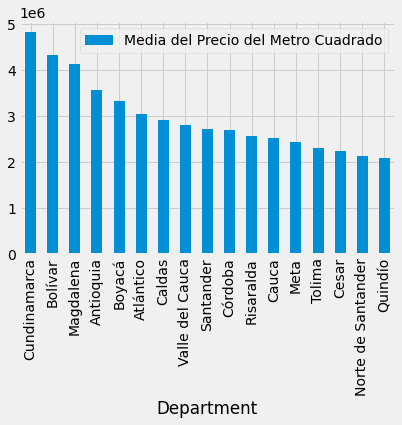

In [ ]:
sp.plot.bar()

### Relaciones vs Precio de la Vivienda

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

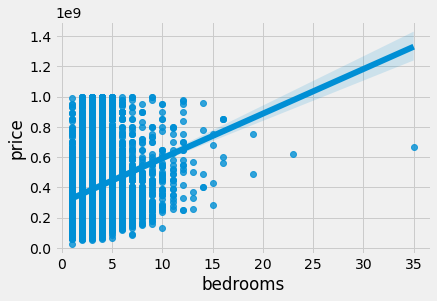

In [ ]:
sns.regplot(x = df_filtrado['bedrooms'], y = df_filtrado['price'])

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

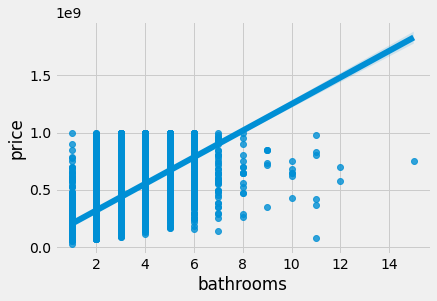

In [ ]:
sns.regplot(x = df_filtrado['bathrooms'], y = df_filtrado['price'])

<AxesSubplot:xlabel='surface_total', ylabel='price'>

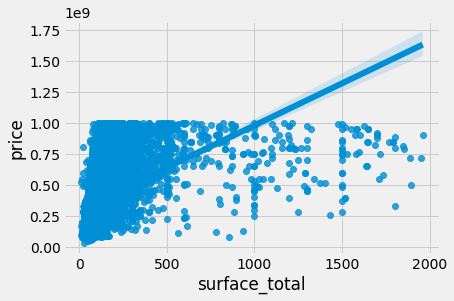

In [ ]:
sns.regplot(x = df_filtrado['surface_total'], y = df_filtrado['price'])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



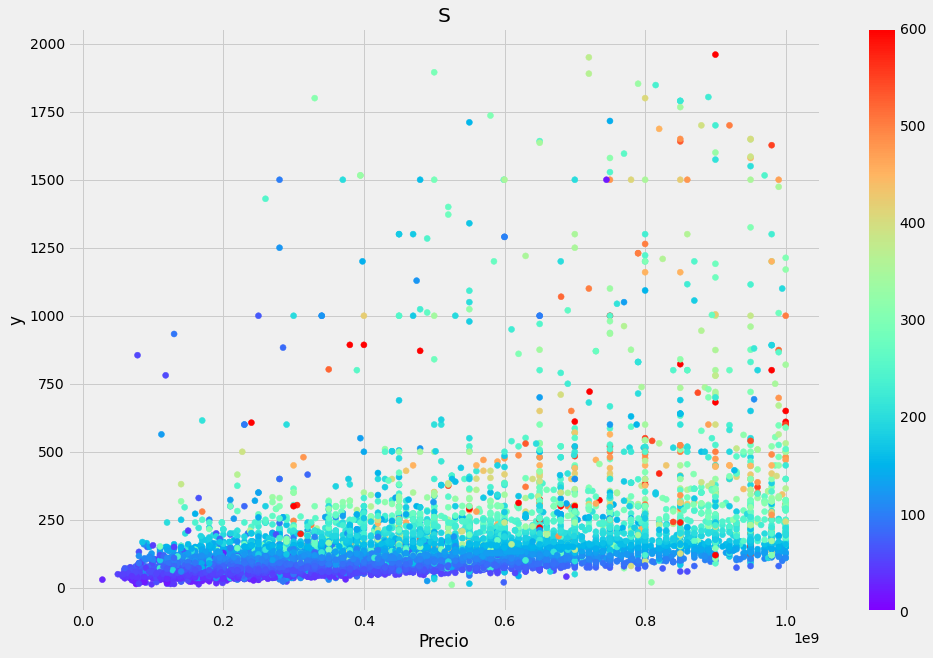

In [ ]:
x = df_filtrado['price']
y = df_filtrado['surface_total']

fig, ax = plt.subplots(figsize=(15, 10))

cmap = plt.cm.rainbow
norm = plt.Normalize(vmin=0, vmax=600)

color=cmap(norm(df_filtrado["surface_covered"].values))


# Plot
plt.scatter(x, y, color = color)
plt.title('S')
plt.xlabel('Precio')
plt.ylabel('y')
#ax.set_xlim(0,15000000000)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

<AxesSubplot:>

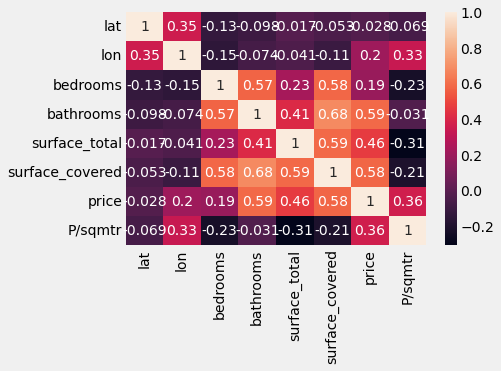

In [ ]:
sns.heatmap(df_filtrado.corr(), annot = True)


## Modelado de Datos

In [ ]:
df_filtrado

,lat,lon,Department,City,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,P/sqmtr
0,11.006,-74.808,Atlántico,Barranquilla,2.0,2.0,95.0,95.0,280000000.0,Apartamento,2947368.0
2,4.689,-74.050,Cundinamarca,Bogotá D.C,2.0,3.0,125.0,125.0,810000000.0,Apartamento,6480000.0
3,3.446,-76.551,Valle del Cauca,Cali,3.0,2.0,91.0,91.0,495000000.0,Apartamento,5439560.0
4,3.383,-76.537,Valle del Cauca,Cali,3.0,2.0,100.0,100.0,350000000.0,Apartamento,3500000.0
5,3.437,-76.548,Valle del Cauca,Cali,3.0,3.0,155.0,139.0,630000000.0,Apartamento,4064516.0
...,...,...,...,...,...,...,...,...,...,...,...
16558,3.367,-76.540,Valle del Cauca,Cali,4.0,5.0,120.0,300.0,980000000.0,Casa,8166666.0
16562,3.436,-76.505,Valle del Cauca,Cali,5.0,1.0,116.0,116.0,170000000.0,Casa,1465517.0
16563,7.838,-72.474,Norte de Santander,Villa del Rosario,5.0,3.0,65.0,70.0,180000000.0,Casa,2769230.0
16564,3.482,-76.519,Valle del Cauca,Cali,5.0,4.0,290.0,320.0,350000000.0,Casa,1206896.0


In [ ]:
dfnew = pd.get_dummies(df_filtrado, columns=['property_type'],drop_first=True, dtype=float)
dfnew

dfnew = dfnew.rename(columns={'property_type_Casa':'property_type',})
dfnew

,lat,lon,Department,City,bedrooms,bathrooms,surface_total,surface_covered,price,P/sqmtr,property_type
0,11.006,-74.808,Atlántico,Barranquilla,2.0,2.0,95.0,95.0,280000000.0,2947368.0,0.0
2,4.689,-74.050,Cundinamarca,Bogotá D.C,2.0,3.0,125.0,125.0,810000000.0,6480000.0,0.0
3,3.446,-76.551,Valle del Cauca,Cali,3.0,2.0,91.0,91.0,495000000.0,5439560.0,0.0
4,3.383,-76.537,Valle del Cauca,Cali,3.0,2.0,100.0,100.0,350000000.0,3500000.0,0.0
5,3.437,-76.548,Valle del Cauca,Cali,3.0,3.0,155.0,139.0,630000000.0,4064516.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
16558,3.367,-76.540,Valle del Cauca,Cali,4.0,5.0,120.0,300.0,980000000.0,8166666.0,1.0
16562,3.436,-76.505,Valle del Cauca,Cali,5.0,1.0,116.0,116.0,170000000.0,1465517.0,1.0
16563,7.838,-72.474,Norte de Santander,Villa del Rosario,5.0,3.0,65.0,70.0,180000000.0,2769230.0,1.0
16564,3.482,-76.519,Valle del Cauca,Cali,5.0,4.0,290.0,320.0,350000000.0,1206896.0,1.0


In [ ]:
dfnew.reset_index(drop=True, inplace=True)
dfnew

,lat,lon,Department,City,bedrooms,bathrooms,surface_total,surface_covered,price,P/sqmtr,property_type
0,11.006,-74.808,Atlántico,Barranquilla,2.0,2.0,95.0,95.0,280000000.0,2947368.0,0.0
1,4.689,-74.050,Cundinamarca,Bogotá D.C,2.0,3.0,125.0,125.0,810000000.0,6480000.0,0.0
2,3.446,-76.551,Valle del Cauca,Cali,3.0,2.0,91.0,91.0,495000000.0,5439560.0,0.0
3,3.383,-76.537,Valle del Cauca,Cali,3.0,2.0,100.0,100.0,350000000.0,3500000.0,0.0
4,3.437,-76.548,Valle del Cauca,Cali,3.0,3.0,155.0,139.0,630000000.0,4064516.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13798,3.367,-76.540,Valle del Cauca,Cali,4.0,5.0,120.0,300.0,980000000.0,8166666.0,1.0
13799,3.436,-76.505,Valle del Cauca,Cali,5.0,1.0,116.0,116.0,170000000.0,1465517.0,1.0
13800,7.838,-72.474,Norte de Santander,Villa del Rosario,5.0,3.0,65.0,70.0,180000000.0,2769230.0,1.0
13801,3.482,-76.519,Valle del Cauca,Cali,5.0,4.0,290.0,320.0,350000000.0,1206896.0,1.0


In [ ]:
dfnew.columns

Index(['lat', 'lon', 'Department', 'City', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'P/sqmtr',
       'property_type'],
      dtype='object')

In [ ]:
train_features = dfnew[['bedrooms','bathrooms','surface_total','surface_covered','P/sqmtr','property_type']]
train_features.head(5)

,bedrooms,bathrooms,surface_total,surface_covered,P/sqmtr,property_type
0,2.0,2.0,95.0,95.0,2947368.0,0.0
1,2.0,3.0,125.0,125.0,6480000.0,0.0
2,3.0,2.0,91.0,91.0,5439560.0,0.0
3,3.0,2.0,100.0,100.0,3500000.0,0.0
4,3.0,3.0,155.0,139.0,4064516.0,0.0


In [ ]:
targets = dfnew[['price']]
targets.head(5)

,price
0,280000000.0
1,810000000.0
2,495000000.0
3,350000000.0
4,630000000.0


In [ ]:
# Hyperparameters.

param_gride = {"model__max_depth": [5,10,15,20],"model__min_samples_split": [5,10,15,20],"model__min_samples_leaf": [5,10,15,20],"model__n_estimators": [100]}
#param_gride = {"model__max_depth": [5,10,20],"model__min_samples_split": [5,10,20],"model__min_samples_leaf": [5,10,20],"model__n_estimators": [100]}
#param_gride = {"model__max_depth": [5,20],"model__min_samples_split": [5,10],"model__min_samples_leaf": [5,10,20],"model__n_estimators": [100]}
#param_gride = {"model__max_depth": [5],"model__min_samples_split": [5],"model__min_samples_leaf": [5],"model__n_estimators": [100]}

# param_gride = {"model__max_depth": [10,20,30,40,50,60,70,80,90,100],
#               "model__min_samples_split": [2,4,6,8,10,12,14,16,18,20],
#               "model__min_samples_leaf": [1,2,3,4,5,6,7,8,9,10],
#               "model__n_estimators": [100,200,300,400,500,600,700,800,900,1000]
#                                         }

In [ ]:
import time
start_time = time.time()
print('-------------------INICIO PROCESAMIENTO-----------------')


# Train, test split.
data_split = train_test_split(train_features, targets, test_size=0.3, random_state=4444)
X_train, X_test, targets_train, targets_test = data_split

# Find the best model per target.
for target in range(targets.shape[1]):
    # Getting the target.
    y_train = targets_train.iloc[:, target]
    y_test = targets_test.iloc[:, target]

    # Model definition.
    pipe = Pipeline([("minmax", MinMaxScaler((-1, 1))),
                      ("model", RandomForestRegressor(random_state=4444,n_jobs=-1))])
    # By default GridSearchCV uses a 5-kfold validation strategy.
    search = GridSearchCV(estimator=pipe, param_grid = param_gride, cv=10, n_jobs=-1)  
    search.fit(X_train.values, y_train.values)

    # Getting the test score.
    y_hat_test = search.predict(X_test.values)
    test_score = r2_score(y_test.values, y_hat_test)

    # Printing stats.
    print(f"Columna: {targets.columns[target]}")
    print(f"Best CV score: {search.best_score_:0.3f}")
    print(f"Test score: {test_score:0.3f}")
    print(f"Best Parameters:\n {search.best_params_}")
    print("")

print('--------------------------------------------------------------')
print('PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!')
print('--------------------------------------------------------------')

TIEMPO = (time.time() - start_time)/60

# print("--- %s Segundos ---" % (time.time() - start_time))
print("--- %s Minutos ---" % (TIEMPO))

-------------------INICIO PROCESAMIENTO-----------------


KeyboardInterrupt: 

-------------------INICIO PROCESAMIENTO-----------------
Columna: price
Best CV score: 0.995
Test score: 0.996
Best Parameters:
 {'model__max_depth': 20, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 100}

--------------------------------------------------------------
PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!
--------------------------------------------------------------
--- 4.091889691352844 Minutos ---

In [ ]:
#### Hyperparameters.
maxdepth1 = 20
minsampleleaf1 = 5
minsamplesplit1 = 5
nestimators = 100

TiempoEntrenamientoTRAIN=[]
TiempoEvaluacionTRAIN=[]
RMSETrain=[]
R2Train=[]
MSETrain=[]
MAETrain=[]

TiempoEntrenamientoTEST=[]
TiempoEvaluacionTEST=[]
RMSETest=[]
R2Test=[]
MSETest=[]
MAETest=[]



In [ ]:
X = train_features

#Selecciono target
y = targets
        
#separo datos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size = 0.3, random_state=4444)

## se escalan los datos
# escalar = MinMaxScaler(feature_range=(-1,1))
# X_train = escalar.fit_transform(X_train)
# X_test = escalar.fit_transform(X_test)
#MODELO DE RANDOM FOREST REGRESSOR
LR_simple1 = Pipeline([("minmax", MinMaxScaler((-1, 1))),
                      ("model", RandomForestRegressor(max_depth=maxdepth1,
                                 n_estimators=nestimators,
                                 min_samples_leaf=minsampleleaf1,
                                 min_samples_split=minsamplesplit1,
                                 random_state=4444,n_jobs=-1))])

In [ ]:
LR_simple1.fit(X_train1, y_train1.values.ravel())
#LR_simple = RandomForestRegressor(max_depth=maxdepth1,n_estimators=nestimators,min_samples_leaf=minsampleleaf1,min_samples_split=minsamplesplit1,random_state=4444,n_jobs=-1)
scoring = ['r2','neg_root_mean_squared_error','neg_mean_squared_error','neg_mean_absolute_error']

In [ ]:
###Con datos de Train
scores1 = cross_validate(LR_simple1, X_train1, y_train1, scoring=scoring, n_jobs=-1, cv=10)
TiempoPromedioEntrenamientoTRAIN = mean(scores1['fit_time'])
TiempoPromedioEvaluacionTRAIN = mean(scores1['score_time'])
RMSEPromedioTRAIN = mean(scores1['test_neg_root_mean_squared_error'])
R2PromedioTRAIN = mean(scores1['test_r2'])
MSEPromedioTRAIN = mean(scores1['test_neg_mean_squared_error'])
MAEPromedioTRAIN = mean(scores1['test_neg_mean_absolute_error'])

RMSETrain.append(RMSEPromedioTRAIN)
R2Train.append(R2PromedioTRAIN)
MSETrain.append(MSEPromedioTRAIN)
MAETrain.append(MAEPromedioTRAIN)

RMSETrainFinal=pd.DataFrame(RMSETrain)
R2TrainFinal=pd.DataFrame(R2Train)
MSETrainFinal=pd.DataFrame(MSETrain)
MAETrainFinal=pd.DataFrame(MAETrain)

###Con datos de Test
scores2 = cross_validate(LR_simple1, X_test1, y_test1, scoring=scoring, n_jobs=-1, cv=10)

# # Getting the test score.
# y_hat_test = LR_simple.predict(X_test)
# test_score = r2_score(y_test, y_hat_test)


TiempoPromedioEntrenamientoTEST = mean(scores2['fit_time'])
TiempoPromedioEvaluacionTEST = mean(scores2['score_time'])
RMSEPromedioTEST = mean(scores2['test_neg_root_mean_squared_error'])
R2PromedioTEST = mean(scores2['test_r2'])
MSEPromedioTEST = mean(scores2['test_neg_mean_squared_error'])
MAEPromedioTEST = mean(scores2['test_neg_mean_absolute_error'])
TiempoEntrenamientoTEST.append(TiempoPromedioEntrenamientoTEST)
TiempoEvaluacionTEST.append(TiempoPromedioEvaluacionTEST)
RMSETest.append(RMSEPromedioTEST)
R2Test.append(R2PromedioTEST)
MSETest.append(MSEPromedioTEST)
MAETest.append(MAEPromedioTEST)

RMSETestFinal=pd.DataFrame(RMSETest)
R2TestFinal=pd.DataFrame(R2Test)
MSETestFinal=pd.DataFrame(MSETest)
MAETestFinal=pd.DataFrame(MAETest)

RMSE1 = pd.concat([RMSETrainFinal,RMSETestFinal], axis=1)
R21 = pd.concat([R2TrainFinal,R2TestFinal], axis=1)
MSE1= pd.concat([MSETrainFinal,MSETestFinal], axis=1)
MAE1= pd.concat([MAETrainFinal,MAETestFinal], axis=1)
####Creacion Tablas    
tabla1 = pd.concat([R21,RMSE1,MSE1,MAE1], axis=1)
tabla1.columns = ['R2Train','R2Test','RMSETrain','RMSETest','MSETrain','MSETest','MAETrain','MAETest']

In [ ]:
tabla1.head(1)

,R2Train,R2Test,RMSETrain,RMSETest,MSETrain,MSETest,MAETrain,MAETest
0,0.995242,0.9879,-1.519163e+07,-2.440969e+07,-2.406020e+14,-6.175673e+14,-5.319802e+06,-9.094489e+06


In [ ]:
test_X = X_test1
test_preds = LR_simple1.predict(test_X)
test_preds = pd.DataFrame(test_preds)
test_preds

,0
0,4.145855e+08
1,8.211690e+08
2,7.017277e+08
3,5.694096e+08
4,1.553858e+08
...,...
4136,3.228417e+08
4137,1.291795e+08
4138,1.365314e+08
4139,1.360935e+08


In [ ]:
targets

,price
0,280000000.0
1,810000000.0
2,495000000.0
3,350000000.0
4,630000000.0
...,...
13798,980000000.0
13799,170000000.0
13800,180000000.0
13801,350000000.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6a31511f-925b-4e65-879c-c36206b3c9f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>